In [265]:
import sys
import pandas as pd
import numpy as np
from sklearn.feature_extraction import DictVectorizer
import matplotlib.pyplot as plt

file_path = "Surgical_Cases_fm_3.3.csv" #"cleaned.csv"
df = pd.read_csv(file_path,sep=',')

# trueTestDF=df[df['ResultAfterSurgery'].isnull()]
# df.dropna(subset=['ResultAfterSurgery'], how='all',axis=0,inplace=True)




df.columns

Index([u'Masked FIN', u'age', u'Sequence No.', u'SURG_PROCEDURE',
       u'Duration of Surgery (hh:mm).1', u'SURGICAL_SPECIALTY',
       u'Surgeon Hash Name', u'PATIENT_TYPE', u'SN - BM - Pre-Op INR',
       u'SN - BM - Pre-Op Platelet Count', u'SN - BM - PRBC Ordered',
       u'Allogeneic Blood Transfusion', u'SN - BM - Red Blood Cells',
       u'SN - BM - Fresh Frozen Plasma', u'SN - BM - Platelets',
       u'SN - BM - Cryoprecipitate', u'ResultsBeforeSurgery',
       u'ResultAfterSurgery', u'EBL'],
      dtype='object')

In [266]:
df['SN - BM - PRBC Ordered']=df['SN - BM - PRBC Ordered'].fillna(0.0)

In [267]:
df=df.replace('.',0.0)

In [268]:
df['SN - BM - Pre-Op INR']=df['SN - BM - Pre-Op INR'].fillna(0.0)
df['SN - BM - Pre-Op Platelet Count']=df['SN - BM - Pre-Op Platelet Count'].fillna(0.0)

In [269]:
#age count is less since it has Nans which will be removed
df.describe()

,age,Sequence No.,SN - BM - PRBC Ordered,SN - BM - Red Blood Cells,SN - BM - Fresh Frozen Plasma,SN - BM - Platelets,SN - BM - Cryoprecipitate,ResultsBeforeSurgery,ResultAfterSurgery
count,27196.000000,27217.000000,27217.000000,27217.000000,27217.000000,27217.000000,27217.000000,27217.000000,19428.000000
mean,60.520702,14262.616416,1.269241,0.580626,0.340837,0.228373,0.766074,12.357422,11.177199
std,15.061706,8400.507829,3.482613,2.537552,2.042489,1.194519,4.938831,2.559800,2.035386
min,13.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.107500,2.808300
25%,51.000000,6931.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.802500,9.802900
50%,63.000000,14127.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.804800,11.108800
75%,71.000000,21487.000000,2.052000,0.000000,0.000000,0.000000,0.000000,14.204900,12.603800
max,103.000000,29285.000000,414.601000,72.088700,55.004500,57.005500,125.047000,19.906300,19.108500


In [270]:
#removing rows that have pre ordered blood 0 but the remaining four columns greater than 0
print df.loc[[all([a, b]) for a, b in zip(df['SN - BM - PRBC Ordered']==0,df['SN - BM - Red Blood Cells']>0)]].shape
df.drop(df.loc[[all([a, b]) for a, b in zip(df['SN - BM - PRBC Ordered']==0,df['SN - BM - Red Blood Cells']>0)]].index,inplace=True)

(336, 19)


In [271]:
df.loc[[all([a, b]) for a, b in zip(df['SN - BM - PRBC Ordered']==0,df['SN - BM - Red Blood Cells']>0)]]

,Masked FIN,age,Sequence No.,SURG_PROCEDURE,Duration of Surgery (hh:mm).1,SURGICAL_SPECIALTY,Surgeon Hash Name,PATIENT_TYPE,SN - BM - Pre-Op INR,SN - BM - Pre-Op Platelet Count,SN - BM - PRBC Ordered,Allogeneic Blood Transfusion,SN - BM - Red Blood Cells,SN - BM - Fresh Frozen Plasma,SN - BM - Platelets,SN - BM - Cryoprecipitate,ResultsBeforeSurgery,ResultAfterSurgery,EBL


In [272]:
print df.loc[[all([a, b]) for a, b in zip(df['SN - BM - PRBC Ordered']==0,df['SN - BM - Fresh Frozen Plasma']>0)]].shape
df.drop(df.loc[[all([a, b]) for a, b in zip(df['SN - BM - PRBC Ordered']==0,df['SN - BM - Fresh Frozen Plasma']>0)]].index,inplace=True)

(40, 19)


In [273]:
print df.loc[[all([a, b]) for a, b in zip(df['SN - BM - PRBC Ordered']==0,df['SN - BM - Platelets']>0)]].shape
df.drop(df.loc[[all([a, b]) for a, b in zip(df['SN - BM - PRBC Ordered']==0,df['SN - BM - Platelets']>0)]].index,inplace=True)

(30, 19)


In [274]:
print df.loc[[all([a, b]) for a, b in zip(df['SN - BM - PRBC Ordered']==0,df['SN - BM - Cryoprecipitate']>0)]].shape
df.drop(df.loc[[all([a, b]) for a, b in zip(df['SN - BM - PRBC Ordered']==0,df['SN - BM - Cryoprecipitate']>0)]].index,inplace=True)

(3, 19)


In [275]:
# print df['ResultsBeforeSurgery'].isnull().shape
# df.dropna(subset=['ResultsBeforeSurgery'], how='all',axis=0,inplace=True)

In [276]:
# columns that wont be necessary for predicting anemic status
del df['Masked FIN']
del df['Sequence No.']
del df['Duration of Surgery (hh:mm).1']
del df['SN - BM - PRBC Ordered']
del df['EBL']

In [277]:
# removing all rows with age Nan
print df[df['age'].isnull()].shape
df.drop(df[df['age'].isnull()].index,inplace=True)
df['ResultAfterSurgery']=df['ResultAfterSurgery'].fillna(0.0)

(21, 14)


In [278]:
df.describe()

,age,SN - BM - Red Blood Cells,SN - BM - Fresh Frozen Plasma,SN - BM - Platelets,SN - BM - Cryoprecipitate,ResultsBeforeSurgery,ResultAfterSurgery
count,26787.000000,26787.000000,26787.000000,26787.000000,26787.000000,26787.000000,26787.000000
mean,60.453205,0.538954,0.321332,0.217105,0.742109,12.378347,7.960658
std,15.083706,2.459470,1.991121,1.177681,4.892697,2.557197,5.356095
min,13.000000,0.000000,0.000000,0.000000,0.000000,3.107500,0.000000
25%,51.000000,0.000000,0.000000,0.000000,0.000000,10.805900,0.000000
50%,63.000000,0.000000,0.000000,0.000000,0.000000,12.806400,10.103600
75%,71.000000,0.000000,0.000000,0.000000,0.000000,14.206050,12.002800
max,103.000000,72.088700,55.004500,57.005500,125.047000,19.906300,19.108500


In [279]:
pd.isnull(df).any()

age                                False
SURG_PROCEDURE                     False
SURGICAL_SPECIALTY                 False
Surgeon Hash Name                  False
PATIENT_TYPE                       False
SN - BM - Pre-Op INR               False
SN - BM - Pre-Op Platelet Count    False
Allogeneic Blood Transfusion       False
SN - BM - Red Blood Cells          False
SN - BM - Fresh Frozen Plasma      False
SN - BM - Platelets                False
SN - BM - Cryoprecipitate          False
ResultsBeforeSurgery               False
ResultAfterSurgery                 False
dtype: bool

In [280]:
# df['SURG_PROCEDURE']=pd.factorize(df['SURG_PROCEDURE'])

In [281]:
df.dtypes

age                                float64
SURG_PROCEDURE                      object
SURGICAL_SPECIALTY                  object
Surgeon Hash Name                   object
PATIENT_TYPE                        object
SN - BM - Pre-Op INR                object
SN - BM - Pre-Op Platelet Count     object
Allogeneic Blood Transfusion        object
SN - BM - Red Blood Cells          float64
SN - BM - Fresh Frozen Plasma      float64
SN - BM - Platelets                float64
SN - BM - Cryoprecipitate          float64
ResultsBeforeSurgery               float64
ResultAfterSurgery                 float64
dtype: object

In [282]:
#converting to categorical variables
df['SURG_PROCEDURE']=df['SURG_PROCEDURE'].apply(lambda x: x.upper())
df['SURG_PROCEDURE'] = df['SURG_PROCEDURE'].astype('category')
# df['SURG_PROCEDURE'] = df['SURG_PROCEDURE'].cat.codes

df['SURGICAL_SPECIALTY']=df['SURGICAL_SPECIALTY'].apply(lambda x: x.upper())
df['SURGICAL_SPECIALTY'] = df['SURGICAL_SPECIALTY'].astype('category')
# df['SURGICAL_SPECIALTY'] = df['SURGICAL_SPECIALTY'].cat.codes

df['PATIENT_TYPE']=df['PATIENT_TYPE'].apply(lambda x: x.upper())
df['PATIENT_TYPE'] = df['PATIENT_TYPE'].astype('category')
# df['PATIENT_TYPE'] = df['PATIENT_TYPE'].cat.codes

df['Allogeneic Blood Transfusion']=df['Allogeneic Blood Transfusion'].apply(lambda x: x.upper())
df['Allogeneic Blood Transfusion'] = df['Allogeneic Blood Transfusion'].astype('category')
# df['Allogeneic Blood Transfusion'] = df['Allogeneic Blood Transfusion'].cat.codes

df['Surgeon Hash Name']=df['Surgeon Hash Name'].apply(lambda x: x.upper())
df['Surgeon Hash Name'] = df['Surgeon Hash Name'].astype('category')
# df['Surgeon Hash Name'] = df['Surgeon Hash Name'].cat.codes
# df['ResultsBeforeSurgery'] = df['ResultsBeforeSurgery'].astype('category')
# df['ResultsBeforeSurgery'] = df['ResultsBeforeSurgery'].cat.codes
# df['ResultAfterSurgery'] = df['ResultAfterSurgery'].astype('category')
# df['ResultAfterSurgery'] = df['ResultAfterSurgery'].cat.codes

df['SN - BM - Pre-Op INR'] = df['SN - BM - Pre-Op INR'].astype('float64')
df['SN - BM - Pre-Op Platelet Count'] = df['SN - BM - Pre-Op Platelet Count'].astype('float64')
df['SN - BM - Red Blood Cells'] = df['SN - BM - Red Blood Cells'].astype('double')
df['SN - BM - Fresh Frozen Plasma'] = df['SN - BM - Fresh Frozen Plasma'].astype('double')
df['SN - BM - Platelets'] = df['SN - BM - Platelets'].astype('double')
df['SN - BM - Cryoprecipitate'] = df['SN - BM - Cryoprecipitate'].astype('double')

In [283]:
df.ix[27211]

age                                                                      73
SURG_PROCEDURE                     WOUND IRRIGATION AND DEBRIDEMENT LOWER E
SURGICAL_SPECIALTY                                         VASCULAR SURGERY
Surgeon Hash Name                                                    DR. 54
PATIENT_TYPE                                                    OBSERVATION
SN - BM - Pre-Op INR                                                  1.303
SN - BM - Pre-Op Platelet Count                                      628.13
Allogeneic Blood Transfusion                                            YES
SN - BM - Red Blood Cells                                            3.0026
SN - BM - Fresh Frozen Plasma                                             0
SN - BM - Platelets                                                       0
SN - BM - Cryoprecipitate                                                 0
ResultsBeforeSurgery                                                10.4083
ResultAfterS

In [284]:
type((3.0026-df['SN - BM - Red Blood Cells'].mean())/df['SN - BM - Red Blood Cells'].std())

numpy.float64

In [285]:

print pd.isnull(df).any()
df.dtypes

age                                False
SURG_PROCEDURE                     False
SURGICAL_SPECIALTY                 False
Surgeon Hash Name                  False
PATIENT_TYPE                       False
SN - BM - Pre-Op INR               False
SN - BM - Pre-Op Platelet Count    False
Allogeneic Blood Transfusion       False
SN - BM - Red Blood Cells          False
SN - BM - Fresh Frozen Plasma      False
SN - BM - Platelets                False
SN - BM - Cryoprecipitate          False
ResultsBeforeSurgery               False
ResultAfterSurgery                 False
dtype: bool


age                                 float64
SURG_PROCEDURE                     category
SURGICAL_SPECIALTY                 category
Surgeon Hash Name                  category
PATIENT_TYPE                       category
SN - BM - Pre-Op INR                float64
SN - BM - Pre-Op Platelet Count     float64
Allogeneic Blood Transfusion       category
SN - BM - Red Blood Cells           float64
SN - BM - Fresh Frozen Plasma       float64
SN - BM - Platelets                 float64
SN - BM - Cryoprecipitate           float64
ResultsBeforeSurgery                float64
ResultAfterSurgery                  float64
dtype: object

In [286]:
df

,age,SURG_PROCEDURE,SURGICAL_SPECIALTY,Surgeon Hash Name,PATIENT_TYPE,SN - BM - Pre-Op INR,SN - BM - Pre-Op Platelet Count,Allogeneic Blood Transfusion,SN - BM - Red Blood Cells,SN - BM - Fresh Frozen Plasma,SN - BM - Platelets,SN - BM - Cryoprecipitate,ResultsBeforeSurgery,ResultAfterSurgery
0,36.0,ACHILLES TENDON REPAIR,ORTHOPAEDIC SURGERY,DR. 281,DAY SURGERY,0.000,0.00,NO,0.0000,0.0000,0.0000,0.000,15.6063,0.0000
1,48.0,ANAL CONDYLOMA EXCISION,COLORECTAL SURGERY,DR. 236,OBSERVATION,0.000,0.00,NO,0.0000,0.0000,0.0000,0.000,14.5018,0.0000
2,25.0,ANAL FISTULOTOMY WITH SETON,COLORECTAL SURGERY,DR. 25,DAY SURGERY,0.904,288.09,NO,0.0000,0.0000,0.0000,0.000,17.0057,0.0000
3,29.0,ANAL FISTULOTOMY WITH SETON,COLORECTAL SURGERY,DR. 236,DAY SURGERY,0.000,0.00,NO,0.0000,0.0000,0.0000,0.000,13.3047,0.0000
4,56.0,ANAL FISTULOTOMY WITH SETON,COLORECTAL SURGERY,DR. 25,INPATIENT,0.000,0.00,NO,0.0000,0.0000,0.0000,0.000,11.6062,10.2062
5,29.0,ANAL FISTULOTOMY WITH SETON,COLORECTAL SURGERY,DR. 25,DAY SURGERY,1.006,247.22,NO,0.0000,0.0000,0.0000,0.000,16.1023,0.0000
6,34.0,ANAL MASS EXCISION,COLORECTAL SURGERY,DR. 236,DAY SURGERY,0.000,0.00,NO,0.0000,0.0000,0.0000,0.000,13.6068,0.0000
7,58.0,ANAL MASS EXCISION,COLORECTAL SURGERY,DR. 25,DAY SURGERY,0.000,370.19,NO,0.0000,0.0000,0.0000,0.000,13.6017,13.3017
8,42.0,ANKLE OPEN REDUCTION INTERNAL FIXATION,ORTHOPAEDIC SURGERY,DR. 212,DAY SURGERY,0.000,0.00,NO,0.0000,0.0000,0.0000,0.000,14.4079,0.0000
9,89.0,AORTIC ABDOMINAL ANEURYSM ENDOVASCULAR R,VASCULAR SURGERY,DR. 223,INPATIENT,1.411,105.03,NO,0.0000,0.0000,0.0000,0.000,10.1029,12.7029


In [287]:
df[cols]

,SN - BM - Red Blood Cells,SN - BM - Fresh Frozen Plasma,SN - BM - Platelets,SN - BM - Cryoprecipitate
0,0.0000,0.0000,0.0000,0.000
1,0.0000,0.0000,0.0000,0.000
2,0.0000,0.0000,0.0000,0.000
3,0.0000,0.0000,0.0000,0.000
4,0.0000,0.0000,0.0000,0.000
5,0.0000,0.0000,0.0000,0.000
6,0.0000,0.0000,0.0000,0.000
7,0.0000,0.0000,0.0000,0.000
8,0.0000,0.0000,0.0000,0.000
9,0.0000,0.0000,0.0000,0.000


In [288]:
# scaling the linear data
from sklearn import preprocessing
min_max_scaler=preprocessing.StandardScaler()
cols=['SN - BM - Red Blood Cells','SN - BM - Fresh Frozen Plasma','SN - BM - Platelets','SN - BM - Cryoprecipitate']
df_scaled = pd.DataFrame(min_max_scaler.fit_transform(df[cols]),columns=cols,index=df.index)

In [289]:
df_scaled

,SN - BM - Red Blood Cells,SN - BM - Fresh Frozen Plasma,SN - BM - Platelets,SN - BM - Cryoprecipitate
0,-0.219138,-0.161386,-0.184353,-0.151680
1,-0.219138,-0.161386,-0.184353,-0.151680
2,-0.219138,-0.161386,-0.184353,-0.151680
3,-0.219138,-0.161386,-0.184353,-0.151680
4,-0.219138,-0.161386,-0.184353,-0.151680
5,-0.219138,-0.161386,-0.184353,-0.151680
6,-0.219138,-0.161386,-0.184353,-0.151680
7,-0.219138,-0.161386,-0.184353,-0.151680
8,-0.219138,-0.161386,-0.184353,-0.151680
9,-0.219138,-0.161386,-0.184353,-0.151680


In [290]:
df = df.drop(cols, axis=1)

In [291]:
df.head()

,age,SURG_PROCEDURE,SURGICAL_SPECIALTY,Surgeon Hash Name,PATIENT_TYPE,SN - BM - Pre-Op INR,SN - BM - Pre-Op Platelet Count,Allogeneic Blood Transfusion,ResultsBeforeSurgery,ResultAfterSurgery
0,36.0,ACHILLES TENDON REPAIR,ORTHOPAEDIC SURGERY,DR. 281,DAY SURGERY,0.000,0.00,NO,15.6063,0.0000
1,48.0,ANAL CONDYLOMA EXCISION,COLORECTAL SURGERY,DR. 236,OBSERVATION,0.000,0.00,NO,14.5018,0.0000
2,25.0,ANAL FISTULOTOMY WITH SETON,COLORECTAL SURGERY,DR. 25,DAY SURGERY,0.904,288.09,NO,17.0057,0.0000
3,29.0,ANAL FISTULOTOMY WITH SETON,COLORECTAL SURGERY,DR. 236,DAY SURGERY,0.000,0.00,NO,13.3047,0.0000
4,56.0,ANAL FISTULOTOMY WITH SETON,COLORECTAL SURGERY,DR. 25,INPATIENT,0.000,0.00,NO,11.6062,10.2062


In [292]:
targetDF=df['ResultAfterSurgery']
df=df.ix[:,:-1]
df = df.join(df_scaled)
df= df.join(targetDF)


In [293]:
df.ix[27211]

age                                                                      73
SURG_PROCEDURE                     WOUND IRRIGATION AND DEBRIDEMENT LOWER E
SURGICAL_SPECIALTY                                         VASCULAR SURGERY
Surgeon Hash Name                                                    DR. 54
PATIENT_TYPE                                                    OBSERVATION
SN - BM - Pre-Op INR                                                  1.303
SN - BM - Pre-Op Platelet Count                                      628.13
Allogeneic Blood Transfusion                                            YES
ResultsBeforeSurgery                                                10.4083
SN - BM - Red Blood Cells                                           1.00172
SN - BM - Fresh Frozen Plasma                                     -0.161386
SN - BM - Platelets                                               -0.184353
SN - BM - Cryoprecipitate                                          -0.15168
ResultAfterS

In [294]:
df.describe()

,age,SN - BM - Pre-Op INR,SN - BM - Pre-Op Platelet Count,ResultsBeforeSurgery,SN - BM - Red Blood Cells,SN - BM - Fresh Frozen Plasma,SN - BM - Platelets,SN - BM - Cryoprecipitate,ResultAfterSurgery
count,26787.000000,26787.000000,26787.000000,26787.000000,2.678700e+04,2.678700e+04,2.678700e+04,2.678700e+04,26787.000000
mean,60.453205,1.020189,215.652425,12.378347,-5.941747e-17,-3.183079e-17,-3.607489e-17,2.122052e-17,7.960658
std,15.083706,6.671046,735.634734,2.557197,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,5.356095
min,13.000000,0.000000,0.000000,3.107500,-2.191382e-01,-1.613856e-01,-1.843530e-01,-1.516798e-01,0.000000
25%,51.000000,0.904000,153.130000,10.805900,-2.191382e-01,-1.613856e-01,-1.843530e-01,-1.516798e-01,0.000000
50%,63.000000,1.003000,218.070000,12.806400,-2.191382e-01,-1.613856e-01,-1.843530e-01,-1.516798e-01,10.103600
75%,71.000000,1.008000,274.190000,14.206050,-2.191382e-01,-1.613856e-01,-1.843530e-01,-1.516798e-01,12.002800
max,103.000000,732.682000,108032.460000,19.906300,2.909207e+01,2.746401e+01,4.822144e+01,2.540669e+01,19.108500


In [295]:

print pd.isnull(df).any()
df.dtypes

age                                False
SURG_PROCEDURE                     False
SURGICAL_SPECIALTY                 False
Surgeon Hash Name                  False
PATIENT_TYPE                       False
SN - BM - Pre-Op INR               False
SN - BM - Pre-Op Platelet Count    False
Allogeneic Blood Transfusion       False
ResultsBeforeSurgery               False
SN - BM - Red Blood Cells          False
SN - BM - Fresh Frozen Plasma      False
SN - BM - Platelets                False
SN - BM - Cryoprecipitate          False
ResultAfterSurgery                 False
dtype: bool


age                                 float64
SURG_PROCEDURE                     category
SURGICAL_SPECIALTY                 category
Surgeon Hash Name                  category
PATIENT_TYPE                       category
SN - BM - Pre-Op INR                float64
SN - BM - Pre-Op Platelet Count     float64
Allogeneic Blood Transfusion       category
ResultsBeforeSurgery                float64
SN - BM - Red Blood Cells           float64
SN - BM - Fresh Frozen Plasma       float64
SN - BM - Platelets                 float64
SN - BM - Cryoprecipitate           float64
ResultAfterSurgery                  float64
dtype: object

In [296]:
df.ix[27211]

age                                                                      73
SURG_PROCEDURE                     WOUND IRRIGATION AND DEBRIDEMENT LOWER E
SURGICAL_SPECIALTY                                         VASCULAR SURGERY
Surgeon Hash Name                                                    DR. 54
PATIENT_TYPE                                                    OBSERVATION
SN - BM - Pre-Op INR                                                  1.303
SN - BM - Pre-Op Platelet Count                                      628.13
Allogeneic Blood Transfusion                                            YES
ResultsBeforeSurgery                                                10.4083
SN - BM - Red Blood Cells                                           1.00172
SN - BM - Fresh Frozen Plasma                                     -0.161386
SN - BM - Platelets                                               -0.184353
SN - BM - Cryoprecipitate                                          -0.15168
ResultAfterS

In [298]:
#finding pearson corealtion between the columns
pearson = df.corr(method='pearson')
# assume target attr is the last, then remove corr with itself
corr_with_target = pearson.ix[-1][:-1]
# attributes sorted from the most predictive
predictivity = corr_with_target.sort(ascending=False)
print corr_with_target[abs(corr_with_target).argsort()[::-1]]

age                                0.055404
ResultsBeforeSurgery               0.051943
SN - BM - Red Blood Cells          0.013754
SN - BM - Cryoprecipitate          0.004713
SN - BM - Pre-Op Platelet Count    0.004555
SN - BM - Platelets                0.004195
SN - BM - Fresh Frozen Plasma     -0.003809
SN - BM - Pre-Op INR              -0.000764
Name: ResultAfterSurgery, dtype: float64


/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


In [299]:
#high correlated columns
attrs = pearson.iloc[:-1,:-1] # all except target
# only important correlations and not auto-correlations
threshold = 0.5
# {('LSTAT', 'TAX'): 0.543993, ('INDUS', 'RAD'): 0.595129, ...
important_corrs = (attrs[abs(attrs) > threshold][attrs != 1.0]) \
    .unstack().dropna().to_dict()
#     attribute pair  correlation
# 0     (AGE, INDUS)     0.644779
# 1     (INDUS, RAD)     0.595129
# ...
unique_important_corrs = pd.DataFrame(
    list(set([(tuple(sorted(key)), important_corrs[key]) \
    for key in important_corrs])), columns=['attribute pair', 'correlation'])
# sorted by absolute value
unique_important_corrs = unique_important_corrs.ix[
    abs(unique_important_corrs['correlation']).argsort()[::-1]]
print unique_important_corrs

                                      attribute pair  correlation
4  (SN - BM - Fresh Frozen Plasma, SN - BM - Red ...     0.836347
0  (SN - BM - Fresh Frozen Plasma, SN - BM - Plat...     0.812333
2   (SN - BM - Platelets, SN - BM - Red Blood Cells)     0.766779
1   (SN - BM - Cryoprecipitate, SN - BM - Platelets)     0.742377
5  (SN - BM - Cryoprecipitate, SN - BM - Fresh Fr...     0.655727
3  (SN - BM - Cryoprecipitate, SN - BM - Red Bloo...     0.645869


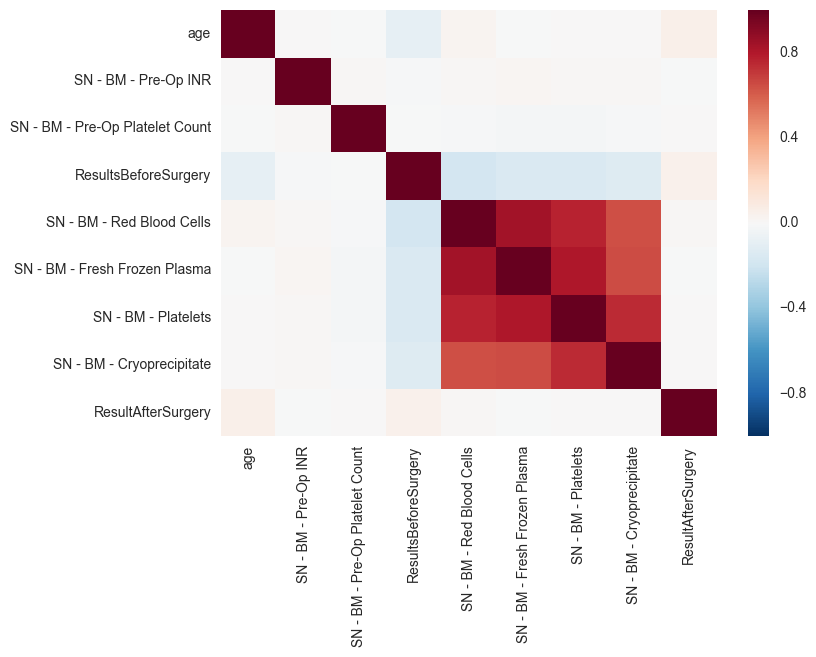

In [300]:
import seaborn as sns; sns.set()
ax = sns.heatmap(pearson,vmin=-1, vmax=1)
plt.show()

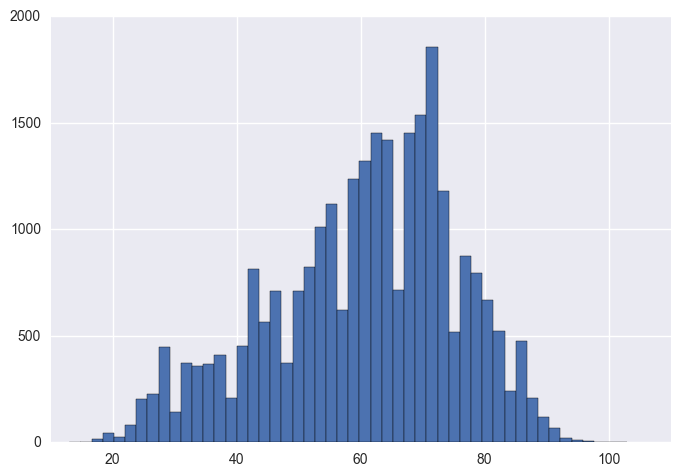

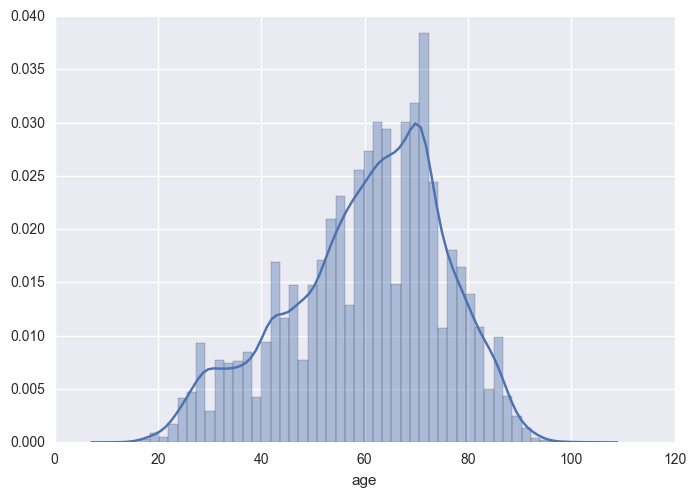

In [301]:
import matplotlib.pyplot as plt
attr = df['age']
# plt.hist(attr)
plt.hist(attr, bins=50)
plt.show()
sns.distplot(attr)
plt.show()
g=sns.pairplot(pearson)
# plt.show()
# g.show()


In [302]:
df.head()

,age,SURG_PROCEDURE,SURGICAL_SPECIALTY,Surgeon Hash Name,PATIENT_TYPE,SN - BM - Pre-Op INR,SN - BM - Pre-Op Platelet Count,Allogeneic Blood Transfusion,ResultsBeforeSurgery,SN - BM - Red Blood Cells,SN - BM - Fresh Frozen Plasma,SN - BM - Platelets,SN - BM - Cryoprecipitate,ResultAfterSurgery
0,36.0,ACHILLES TENDON REPAIR,ORTHOPAEDIC SURGERY,DR. 281,DAY SURGERY,0.000,0.00,NO,15.6063,-0.219138,-0.161386,-0.184353,-0.15168,0.0000
1,48.0,ANAL CONDYLOMA EXCISION,COLORECTAL SURGERY,DR. 236,OBSERVATION,0.000,0.00,NO,14.5018,-0.219138,-0.161386,-0.184353,-0.15168,0.0000
2,25.0,ANAL FISTULOTOMY WITH SETON,COLORECTAL SURGERY,DR. 25,DAY SURGERY,0.904,288.09,NO,17.0057,-0.219138,-0.161386,-0.184353,-0.15168,0.0000
3,29.0,ANAL FISTULOTOMY WITH SETON,COLORECTAL SURGERY,DR. 236,DAY SURGERY,0.000,0.00,NO,13.3047,-0.219138,-0.161386,-0.184353,-0.15168,0.0000
4,56.0,ANAL FISTULOTOMY WITH SETON,COLORECTAL SURGERY,DR. 25,INPATIENT,0.000,0.00,NO,11.6062,-0.219138,-0.161386,-0.184353,-0.15168,10.2062


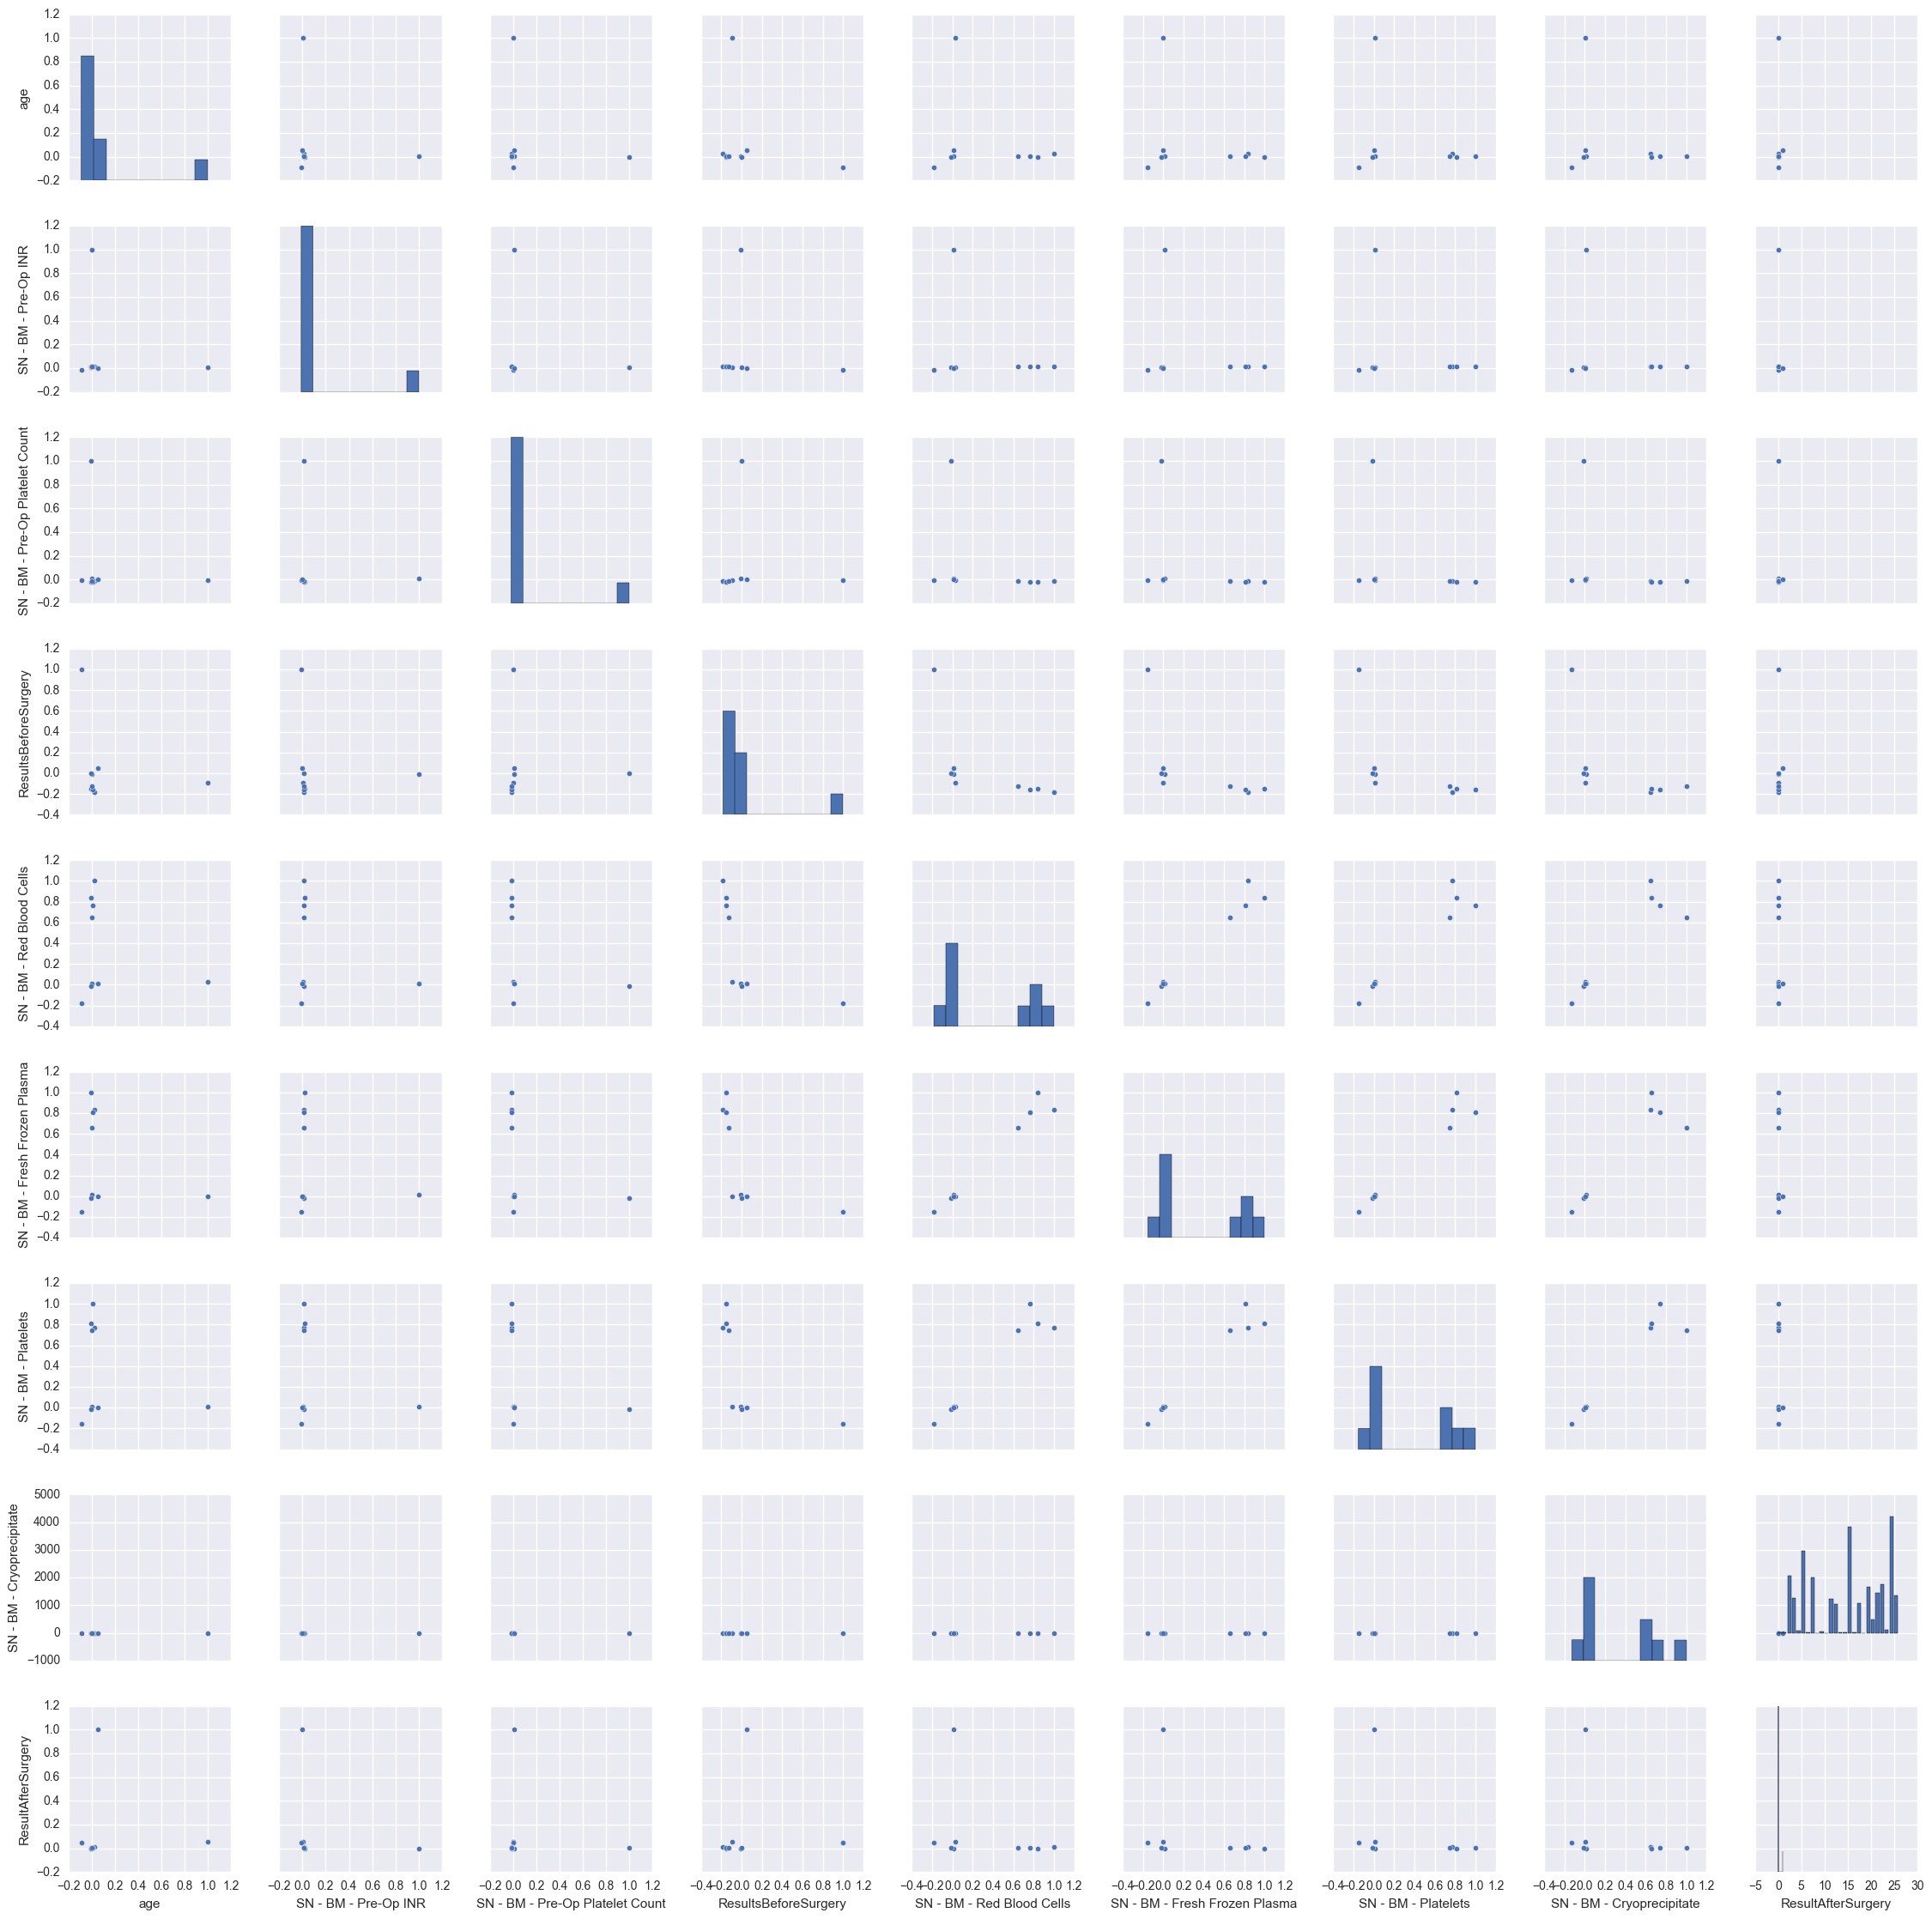

In [303]:
cat_attr = df['SURGICAL_SPECIALTY'].cat.codes
h = cat_attr.value_counts()
values, counts = h.index, h
plt.bar(values, counts)
# or more compactly:
# plt.bar(*list(zip(*cat_attr.value_counts().i)))
plt.xticks()
plt.show()

In [304]:
grouped = df.groupby('SURGICAL_SPECIALTY')
print grouped.size()
print grouped.mean()

SURGICAL_SPECIALTY
ANESTHESIOLOGY                21
CARDIOLOGY                    10
CARDIOTHORACIC SURGERY      2064
COLORECTAL SURGERY          1271
CRITICAL CARE-TRAUMA          81
ENT                         2981
GASTROENTEROLOGY              18
GENERAL SURGERY             1992
INTERVENTIONAL RADIOLOGY       3
MISSING SPECIALTY             51
NEUROLOGY                      2
NEUROSURGERY                1218
OBGYN                       1033
OMFS                          15
OPTHALMOLOGY                  24
ORTHOPAEDIC SURGERY         3848
OTHER                         29
PLASTIC SURGERY             1084
PULMONOLOGY                    5
SPINE SURGERY               1653
SURGICAL ONCOLOGY            494
THORACIC SURGERY            1451
TRANSPLANTHEPATOBILIARY     1760
TRANSPLANTUROLOGY            128
UROLOGY                     4197
VASCULAR SURGERY            1354
dtype: int64
                                age  SN - BM - Pre-Op INR  \
SURGICAL_SPECIALTY                               

In [305]:
grouped = df.groupby('SURGICAL_SPECIALTY')
print grouped.size()

SURGICAL_SPECIALTY
ANESTHESIOLOGY                21
CARDIOLOGY                    10
CARDIOTHORACIC SURGERY      2064
COLORECTAL SURGERY          1271
CRITICAL CARE-TRAUMA          81
ENT                         2981
GASTROENTEROLOGY              18
GENERAL SURGERY             1992
INTERVENTIONAL RADIOLOGY       3
MISSING SPECIALTY             51
NEUROLOGY                      2
NEUROSURGERY                1218
OBGYN                       1033
OMFS                          15
OPTHALMOLOGY                  24
ORTHOPAEDIC SURGERY         3848
OTHER                         29
PLASTIC SURGERY             1084
PULMONOLOGY                    5
SPINE SURGERY               1653
SURGICAL ONCOLOGY            494
THORACIC SURGERY            1451
TRANSPLANTHEPATOBILIARY     1760
TRANSPLANTUROLOGY            128
UROLOGY                     4197
VASCULAR SURGERY            1354
dtype: int64


In [306]:
df.head()

,age,SURG_PROCEDURE,SURGICAL_SPECIALTY,Surgeon Hash Name,PATIENT_TYPE,SN - BM - Pre-Op INR,SN - BM - Pre-Op Platelet Count,Allogeneic Blood Transfusion,ResultsBeforeSurgery,SN - BM - Red Blood Cells,SN - BM - Fresh Frozen Plasma,SN - BM - Platelets,SN - BM - Cryoprecipitate,ResultAfterSurgery
0,36.0,ACHILLES TENDON REPAIR,ORTHOPAEDIC SURGERY,DR. 281,DAY SURGERY,0.000,0.00,NO,15.6063,-0.219138,-0.161386,-0.184353,-0.15168,0.0000
1,48.0,ANAL CONDYLOMA EXCISION,COLORECTAL SURGERY,DR. 236,OBSERVATION,0.000,0.00,NO,14.5018,-0.219138,-0.161386,-0.184353,-0.15168,0.0000
2,25.0,ANAL FISTULOTOMY WITH SETON,COLORECTAL SURGERY,DR. 25,DAY SURGERY,0.904,288.09,NO,17.0057,-0.219138,-0.161386,-0.184353,-0.15168,0.0000
3,29.0,ANAL FISTULOTOMY WITH SETON,COLORECTAL SURGERY,DR. 236,DAY SURGERY,0.000,0.00,NO,13.3047,-0.219138,-0.161386,-0.184353,-0.15168,0.0000
4,56.0,ANAL FISTULOTOMY WITH SETON,COLORECTAL SURGERY,DR. 25,INPATIENT,0.000,0.00,NO,11.6062,-0.219138,-0.161386,-0.184353,-0.15168,10.2062


In [307]:
cat_columns = df.select_dtypes(['category']).columns
print cat_columns
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)
df.head()

Index([u'SURG_PROCEDURE', u'SURGICAL_SPECIALTY', u'Surgeon Hash Name',
       u'PATIENT_TYPE', u'Allogeneic Blood Transfusion'],
      dtype='object')


,age,SURG_PROCEDURE,SURGICAL_SPECIALTY,Surgeon Hash Name,PATIENT_TYPE,SN - BM - Pre-Op INR,SN - BM - Pre-Op Platelet Count,Allogeneic Blood Transfusion,ResultsBeforeSurgery,SN - BM - Red Blood Cells,SN - BM - Fresh Frozen Plasma,SN - BM - Platelets,SN - BM - Cryoprecipitate,ResultAfterSurgery
0,36.0,7,15,87,0,0.000,0.00,0,15.6063,-0.219138,-0.161386,-0.184353,-0.15168,0.0000
1,48.0,12,3,69,4,0.000,0.00,0,14.5018,-0.219138,-0.161386,-0.184353,-0.15168,0.0000
2,25.0,13,3,75,0,0.904,288.09,0,17.0057,-0.219138,-0.161386,-0.184353,-0.15168,0.0000
3,29.0,13,3,69,0,0.000,0.00,0,13.3047,-0.219138,-0.161386,-0.184353,-0.15168,0.0000
4,56.0,13,3,75,2,0.000,0.00,0,11.6062,-0.219138,-0.161386,-0.184353,-0.15168,10.2062


In [308]:
df.dtypes

age                                float64
SURG_PROCEDURE                       int16
SURGICAL_SPECIALTY                    int8
Surgeon Hash Name                    int16
PATIENT_TYPE                          int8
SN - BM - Pre-Op INR               float64
SN - BM - Pre-Op Platelet Count    float64
Allogeneic Blood Transfusion          int8
ResultsBeforeSurgery               float64
SN - BM - Red Blood Cells          float64
SN - BM - Fresh Frozen Plasma      float64
SN - BM - Platelets                float64
SN - BM - Cryoprecipitate          float64
ResultAfterSurgery                 float64
dtype: object

In [309]:
#finding pearson corealtion between the columns
pearson = df.corr(method='pearson')
# assume target attr is the last, then remove corr with itself
corr_with_target = pearson.ix[-1][:-1]
# attributes sorted from the most predictive
predictivity = corr_with_target.sort(ascending=False)
print corr_with_target[abs(corr_with_target).argsort()[::-1]]

PATIENT_TYPE                       0.242260
SURGICAL_SPECIALTY                 0.063614
age                                0.055404
ResultsBeforeSurgery               0.051943
Surgeon Hash Name                 -0.039778
Allogeneic Blood Transfusion       0.030487
SURG_PROCEDURE                     0.013830
SN - BM - Red Blood Cells          0.013754
SN - BM - Cryoprecipitate          0.004713
SN - BM - Pre-Op Platelet Count    0.004555
SN - BM - Platelets                0.004195
SN - BM - Fresh Frozen Plasma     -0.003809
SN - BM - Pre-Op INR              -0.000764
Name: ResultAfterSurgery, dtype: float64


/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


In [310]:
#high correlated columns
attrs = pearson.iloc[:-1,:-1] # all except target
# only important correlations and not auto-correlations
threshold = 0.5
# {('LSTAT', 'TAX'): 0.543993, ('INDUS', 'RAD'): 0.595129, ...
important_corrs = (attrs[abs(attrs) > threshold][attrs != 1.0]) \
    .unstack().dropna().to_dict()
#     attribute pair  correlation
# 0     (AGE, INDUS)     0.644779
# 1     (INDUS, RAD)     0.595129
# ...
unique_important_corrs = pd.DataFrame(
    list(set([(tuple(sorted(key)), important_corrs[key]) \
    for key in important_corrs])), columns=['attribute pair', 'correlation'])
# sorted by absolute value
unique_important_corrs = unique_important_corrs.ix[
    abs(unique_important_corrs['correlation']).argsort()[::-1]]
print unique_important_corrs

                                      attribute pair  correlation
5  (SN - BM - Fresh Frozen Plasma, SN - BM - Red ...     0.836347
0  (SN - BM - Fresh Frozen Plasma, SN - BM - Plat...     0.812333
3   (SN - BM - Platelets, SN - BM - Red Blood Cells)     0.766779
2   (SN - BM - Cryoprecipitate, SN - BM - Platelets)     0.742377
6  (SN - BM - Cryoprecipitate, SN - BM - Fresh Fr...     0.655727
4  (SN - BM - Cryoprecipitate, SN - BM - Red Bloo...     0.645869
1  (Allogeneic Blood Transfusion, SN - BM - Red B...     0.594316


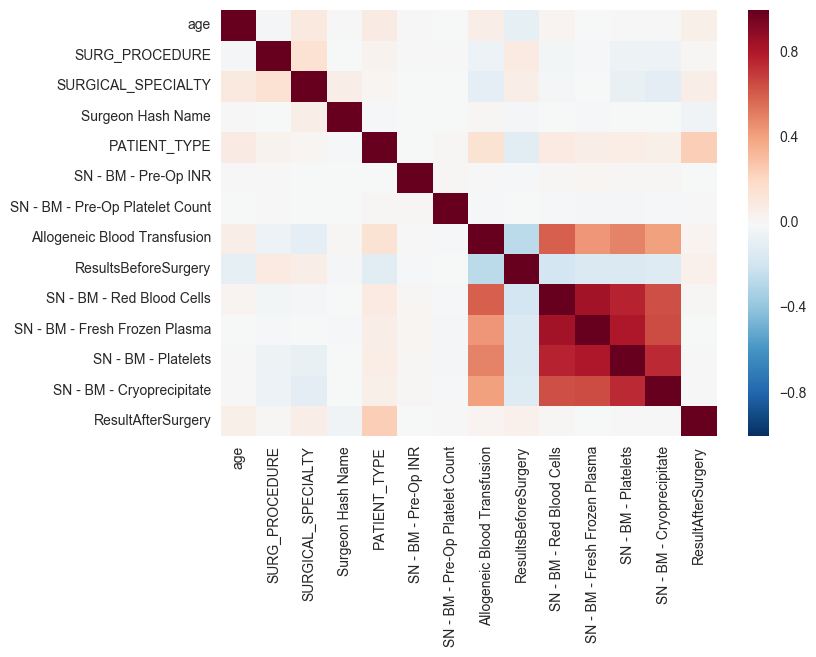

In [311]:
import seaborn as sns; sns.set()
ax = sns.heatmap(pearson,vmin=-1, vmax=1)
plt.show()

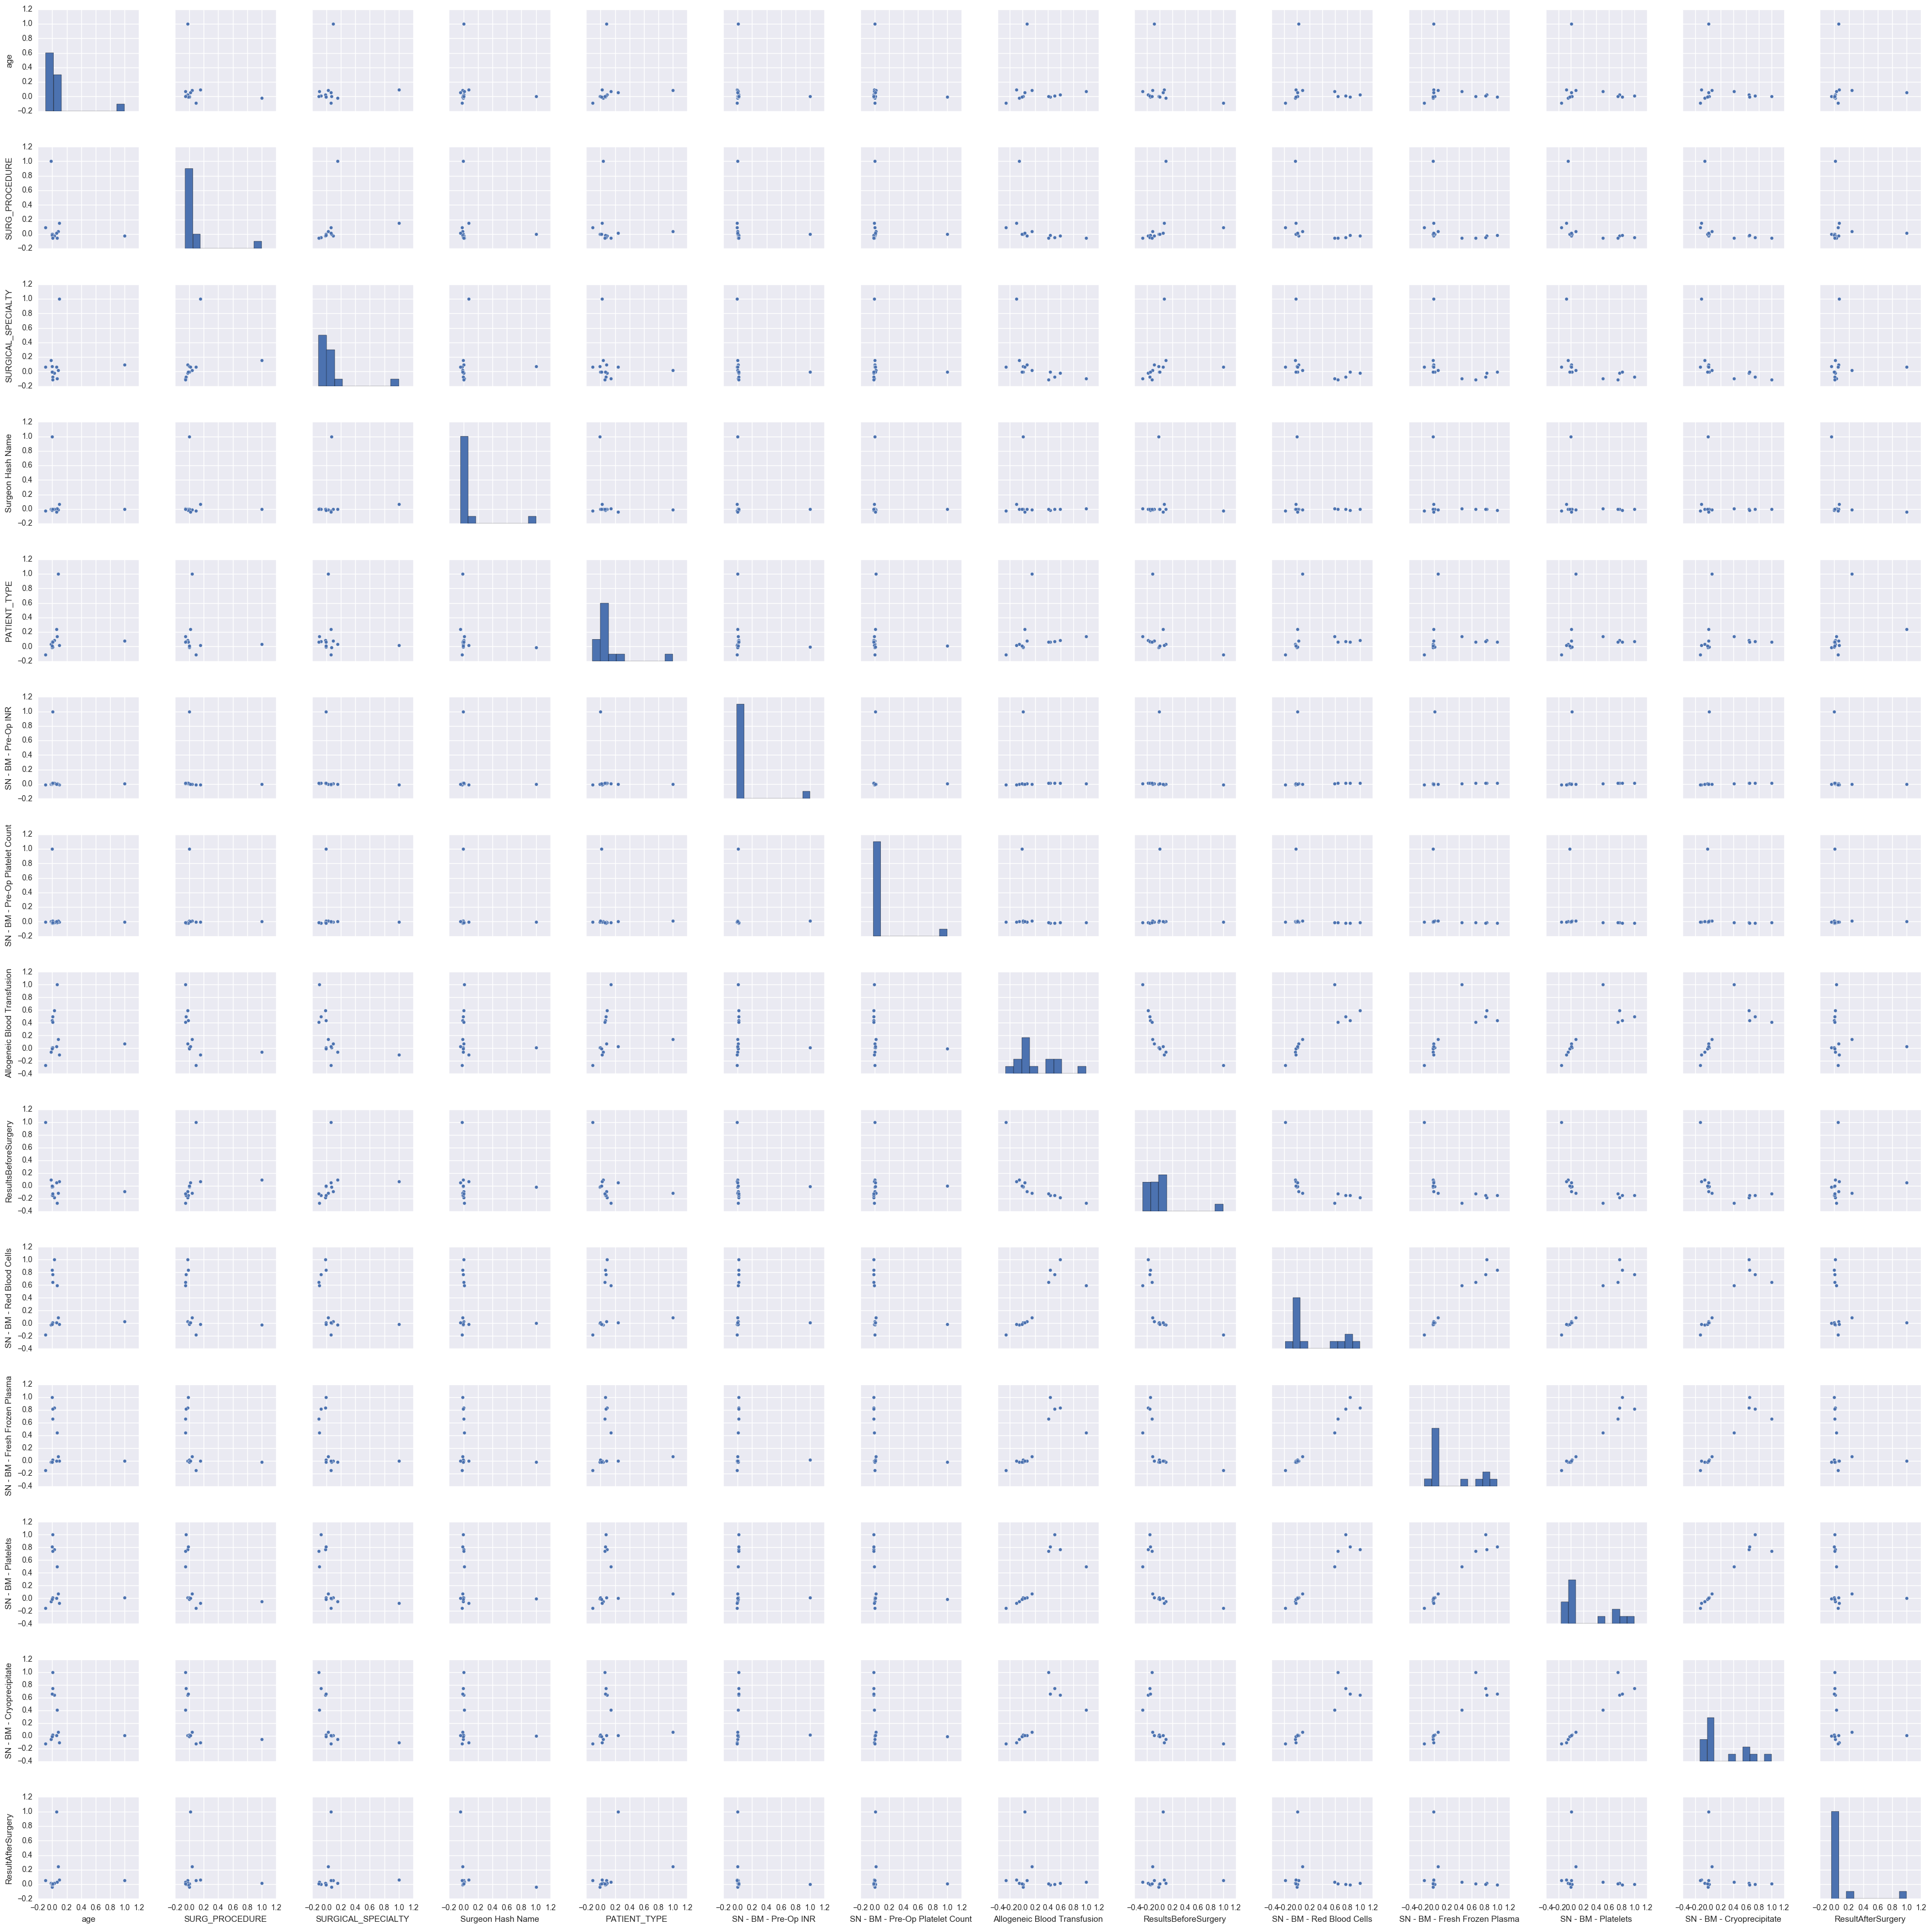

In [312]:
import matplotlib.pyplot as plt
g=sns.pairplot(pearson)
# plt.show()
# g.show()

plt.show()

In [313]:
#converting to categorical variables
df['SURG_PROCEDURE'] = df['SURG_PROCEDURE'].astype('category')
# df['SURG_PROCEDURE'] = df['SURG_PROCEDURE'].cat.codes

df['SURGICAL_SPECIALTY'] = df['SURGICAL_SPECIALTY'].astype('category')
# df['SURGICAL_SPECIALTY'] = df['SURGICAL_SPECIALTY'].cat.codes

df['PATIENT_TYPE'] = df['PATIENT_TYPE'].astype('category')
# df['PATIENT_TYPE'] = df['PATIENT_TYPE'].cat.codes

df['Allogeneic Blood Transfusion'] = df['Allogeneic Blood Transfusion'].astype('category')
# df['Allogeneic Blood Transfusion'] = df['Allogeneic Blood Transfusion'].cat.codes

df['Surgeon Hash Name'] = df['Surgeon Hash Name'].astype('category')
# df['Surgeon Hash Name'] = df['Surgeon Hash Name'].cat.codes
# df['ResultsBeforeSurgery'] = df['ResultsBeforeSurgery'].astype('category')
# df['ResultsBeforeSurgery'] = df['ResultsBeforeSurgery'].cat.codes
# df['ResultAfterSurgery'] = df['ResultAfterSurgery'].astype('category')
# df['ResultAfterSurgery'] = df['ResultAfterSurgery'].cat.codes

# df['SN - BM - Pre-Op INR'] = df['SN - BM - Pre-Op INR'].astype('float64')
# df['SN - BM - Pre-Op Platelet Count'] = df['SN - BM - Pre-Op Platelet Count'].astype('float64')

In [314]:
df.head()

,age,SURG_PROCEDURE,SURGICAL_SPECIALTY,Surgeon Hash Name,PATIENT_TYPE,SN - BM - Pre-Op INR,SN - BM - Pre-Op Platelet Count,Allogeneic Blood Transfusion,ResultsBeforeSurgery,SN - BM - Red Blood Cells,SN - BM - Fresh Frozen Plasma,SN - BM - Platelets,SN - BM - Cryoprecipitate,ResultAfterSurgery
0,36.0,7,15,87,0,0.000,0.00,0,15.6063,-0.219138,-0.161386,-0.184353,-0.15168,0.0000
1,48.0,12,3,69,4,0.000,0.00,0,14.5018,-0.219138,-0.161386,-0.184353,-0.15168,0.0000
2,25.0,13,3,75,0,0.904,288.09,0,17.0057,-0.219138,-0.161386,-0.184353,-0.15168,0.0000
3,29.0,13,3,69,0,0.000,0.00,0,13.3047,-0.219138,-0.161386,-0.184353,-0.15168,0.0000
4,56.0,13,3,75,2,0.000,0.00,0,11.6062,-0.219138,-0.161386,-0.184353,-0.15168,10.2062


In [315]:
trueTestDF=df[df['ResultAfterSurgery']==0]
trueTestDF.head()
df=df.drop(trueTestDF.index)

In [316]:
trueTestDF.head()

,age,SURG_PROCEDURE,SURGICAL_SPECIALTY,Surgeon Hash Name,PATIENT_TYPE,SN - BM - Pre-Op INR,SN - BM - Pre-Op Platelet Count,Allogeneic Blood Transfusion,ResultsBeforeSurgery,SN - BM - Red Blood Cells,SN - BM - Fresh Frozen Plasma,SN - BM - Platelets,SN - BM - Cryoprecipitate,ResultAfterSurgery
0,36.0,7,15,87,0,0.000,0.00,0,15.6063,-0.219138,-0.161386,-0.184353,-0.15168,0.0
1,48.0,12,3,69,4,0.000,0.00,0,14.5018,-0.219138,-0.161386,-0.184353,-0.15168,0.0
2,25.0,13,3,75,0,0.904,288.09,0,17.0057,-0.219138,-0.161386,-0.184353,-0.15168,0.0
3,29.0,13,3,69,0,0.000,0.00,0,13.3047,-0.219138,-0.161386,-0.184353,-0.15168,0.0
5,29.0,13,3,75,0,1.006,247.22,0,16.1023,-0.219138,-0.161386,-0.184353,-0.15168,0.0


In [317]:
df.head()

,age,SURG_PROCEDURE,SURGICAL_SPECIALTY,Surgeon Hash Name,PATIENT_TYPE,SN - BM - Pre-Op INR,SN - BM - Pre-Op Platelet Count,Allogeneic Blood Transfusion,ResultsBeforeSurgery,SN - BM - Red Blood Cells,SN - BM - Fresh Frozen Plasma,SN - BM - Platelets,SN - BM - Cryoprecipitate,ResultAfterSurgery
4,56.0,13,3,75,2,0.000,0.00,0,11.6062,-0.219138,-0.161386,-0.184353,-0.151680,10.2062
7,58.0,14,3,75,0,0.000,370.19,0,13.6017,-0.219138,-0.161386,-0.184353,-0.151680,13.3017
9,89.0,21,25,62,2,1.411,105.03,0,10.1029,-0.219138,-0.161386,-0.184353,-0.151680,12.7029
11,64.0,22,2,34,2,1.210,157.03,1,10.6070,1.409048,1.847771,3.212387,3.936939,14.6070
14,44.0,23,2,86,2,0.000,0.00,1,8.8015,0.595036,-0.161386,-0.184353,-0.151680,8.6015


In [318]:
from sklearn import cross_validation
X_train, X_test, y_train, y_test = cross_validation.train_test_split(df.ix[:,1:-1],
                                                    df.ix[:,-1],
                                                    test_size=0.2,
                                                    random_state=0)

In [319]:
print(X_train.shape)
print(X_test.shape)
print('Training/Test Ratio: {}'.format(X_train.shape[0] / X_test.shape[0]))

(15239, 12)
(3810, 12)
Training/Test Ratio: 3


In [320]:
parameters = {
              'n_estimators': 2500, 
              'max_depth': 4, 
              'min_samples_split': 2,
              'learning_rate': 0.01, 
              'loss': 'ls'
             }
#2500 4 2 0.01 ls

In [321]:
df[df['SN - BM - Red Blood Cells'].isnull()]

,age,SURG_PROCEDURE,SURGICAL_SPECIALTY,Surgeon Hash Name,PATIENT_TYPE,SN - BM - Pre-Op INR,SN - BM - Pre-Op Platelet Count,Allogeneic Blood Transfusion,ResultsBeforeSurgery,SN - BM - Red Blood Cells,SN - BM - Fresh Frozen Plasma,SN - BM - Platelets,SN - BM - Cryoprecipitate,ResultAfterSurgery


In [322]:
from sklearn import ensemble
from sklearn import metrics
classifier = ensemble.GradientBoostingRegressor(**parameters)

classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
mse = metrics.mean_squared_error(y_test, predictions)
print('Mean Square Error: {:.3f}'.format(mse))

Mean Square Error: 2.018


In [323]:
y_test

15951    10.2033
19215    10.8039
20186    13.5022
8551     12.2072
21517     9.7086
5904     13.2025
18942     8.8027
22180     9.9034
10089    13.2027
16940    14.1035
7480     10.5012
26141    14.2016
13915     8.0000
1289     12.1032
26762    15.5068
10985     9.5056
8157     10.1043
24630    10.8031
15956    14.2089
2871     12.6029
12979    10.9071
3772     14.4054
20057     9.1016
15929    10.2042
14056    11.4069
12892    11.5076
7977      9.5012
21865     8.4085
10712     8.6075
12681    13.7028
          ...   
3822      8.8044
13039    14.2047
2480      9.9073
12377     9.0081
1189     11.4067
20301    10.4043
12666    10.6044
26600    12.0033
11241    11.2039
3438     10.0000
13129    11.8081
14062    10.9015
655      13.4049
8969     12.0079
14864    15.1040
24896    10.9058
18051    12.9015
7052     11.5026
20091    12.9063
19265     6.3018
19351     9.8074
25439    10.4044
12455    12.3048
302      11.9089
17014    12.6041
5109     12.6081
24383    11.4057
18671    13.80

In [327]:
c=np.concatenate(([np.array(y_test)],[np.array(predictions)]),axis=0)

In [328]:
c

array([[ 10.2033    ,  10.8039    ,  13.5022    , ...,  13.803     ,
          7.8073    ,  10.5021    ],
       [  9.64052189,  10.6687342 ,  11.23948621, ...,  13.30282871,
          9.37590581,  10.74654532]])